# A) Implementación de algoritmo Merge Sort en Python

In [34]:
# Libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from time import *
from datetime import date


In [ ]:

def merge(left,right):

    temporal_sort = []


    while left and right:  # While the len of left and right > 0
        
        # Sort and combine 
        temporal_sort.append((left if left[0] <= right[0] else right).pop(0))

    
    # Add the last values to have a complete sort array 
    if 0 <= len(left):
        temporal_sort += (left)
    if 0 <= len(right):
        temporal_sort += (right)

    return temporal_sort 


def merge_sort(unsorted_array):

    len_list = len(unsorted_array)

    if len_list == 1 or len_list == 0:
        return unsorted_array
    
    # Calculate the central point of the array

    mid = (len_list)// 2

    # Left Sort
    left_sort = merge_sort(unsorted_array[:mid])
    # Right Sort
    right_sort = merge_sort(unsorted_array[mid:])

    # Return the sorted array

    return merge(left_sort,right_sort)

### Test merge sort

In [ ]:
# Generate a random array with 10 items
unsorted_array = list(np.random.randint(0,100,10))


print(f"Unsorted Array : {unsorted_array}")
sorted_array = merge_sort(unsorted_array)


print(f"Sorted Array {sorted_array}")

Unsorted Array : [64, 14, 67, 72, 14, 77, 85, 75, 21, 19]
Sorted Array [14, 14, 19, 21, 64, 67, 72, 75, 77, 85]


# B) Considerar diferentes valores de n, partiendo de 1 e ir incrementándolo. Para cada valor de n hacer 100 experimentos y reportar la mediana de los tiempos de ejecución de estos (para dicho n).  Se deben tomar valores de n hasta que el tiempo de ejecución total dure m ́as de 5 minutos Específicamente, cada experimento consiste en los siguientes pasos

## a ) Generar aleatoriamente un arreglo de enteros de valores de 1 a 5000
## b ) Calcular el tiempo de ejecución tomado por insertion-sort para ordenar ese arreglo en espec ́ıfico.

In [3]:
# Insertion Sort Algorithm 

def insertion_sort(unsorted_array):
    
    for i in range(1,len(unsorted_array)):   

        key = unsorted_array[i]
        j = i - 1

        while 0 <= j and unsorted_array[j] > key:
            unsorted_array[j+1] = unsorted_array[j]
            j -= 1        
        unsorted_array[j+1] = key
    return unsorted_array
    

In [91]:
start_time = time()
end_time = start_time + (60*5)
n = 1 
average_times = []

while time() < end_time:

    time_temp = []

    # A) Generar aleatoriamente un arreglo de enteros de valores de 1 a 5000
    
    for i in range(100):

        unsorted_array = np.random.randint(1,5000,n)

        start_time_sort = time()
    
        # Sort the unsorted array
        sorted_array = insertion_sort(unsorted_array)

        # Calculate the time for the Insertion Sort Algorithm
        time_execution = time() - start_time_sort
        
        time_temp.append(time_execution)
        
    average_times.append(np.average(np.array(time_temp)))
    
    n += 1

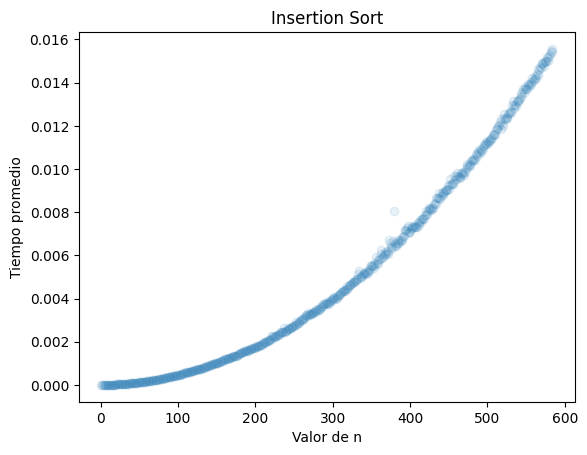

In [102]:
# Create a DataFrame to graph the different times
df_insertionSort = pd.DataFrame({"Size n":list(range(1,n)),"Average Time":average_times})

# Graph

plt.scatter(df_insertionSort['Size n'],df_insertionSort["Average Time"],marker = "o",label = "second",alpha= 0.1)
plt.xlabel("Valor de n")
plt.ylabel("Tiempo promedio")
plt.title("Insertion Sort")
plt.show();